### Prediction with ANN Model

In [1]:
from Model import Model
from preprocessing import Preprocessing

import pandas as pd
import numpy as np
import matplotlib
import math

matplotlib.use('Agg')
%matplotlib inline
np.random.seed(11)

In [2]:
preprocessing = Preprocessing()

In [3]:
df = preprocessing.load_csv('data/data.csv')

In [4]:
df

,Tahun,Bulan,Jumlah Kasus,Kecamatan,Suhu,Kelembapan,Curah_hujan,Lama_penyinaran_matahari,Angin,Jumlah_penduduk,IR
0,2019,2019-01-01,5,Meuraxa,27.0,82.0,14.3,5.3,3.0,22625,22.099448
1,2019,2019-02-01,10,Meuraxa,27.0,83.0,17.0,6.8,3.0,22625,44.198895
2,2019,2019-03-01,4,Meuraxa,27.2,83.0,12.4,6.3,2.0,22625,17.679558
3,2019,2019-04-01,2,Meuraxa,28.0,82.0,10.0,6.0,2.0,22625,8.839779
4,2019,2019-05-01,0,Meuraxa,28.0,79.0,9.0,6.0,3.0,22625,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
535,2015,2015-08-01,0,Ulee Kareng,27.6,77.6,56.1,6.0,2.0,25250,0.000000
536,2015,2015-09-01,0,Ulee Kareng,27.1,80.2,184.5,3.4,2.0,25250,0.000000
537,2015,2015-10-01,1,Ulee Kareng,26.7,80.0,220.9,3.0,2.0,25250,3.960396
538,2015,2015-11-01,2,Ulee Kareng,26.8,84.2,24.6,3.3,2.0,25250,7.920792


In [5]:
df['Bulan'] = pd.to_datetime(df.Bulan)

In [6]:
df.sort_values(by='Bulan', ascending=True)

,Tahun,Bulan,Jumlah Kasus,Kecamatan,Suhu,Kelembapan,Curah_hujan,Lama_penyinaran_matahari,Angin,Jumlah_penduduk,IR
456,2015,2015-01-01,3,Banda Raya,26.6,81.0,81.6,6.0,2.0,23034,13.024225
444,2015,2015-01-01,2,Jaya Baru,26.6,81.0,81.6,6.0,2.0,24561,8.142991
492,2015,2015-01-01,4,Kuta Alam,26.6,81.0,81.6,6.0,2.0,49706,8.047318
480,2015,2015-01-01,3,Lueng Bata,26.6,81.0,81.6,6.0,2.0,24660,12.165450
468,2015,2015-01-01,1,Baiturrahman,26.6,81.0,81.6,6.0,2.0,35363,2.827814
...,...,...,...,...,...,...,...,...,...,...,...
59,2019,2019-12-01,4,Lueng Bata,26.3,83.0,22.8,4.0,3.0,24278,16.475822
71,2019,2019-12-01,1,Kuta Alam,26.3,83.0,22.8,4.0,3.0,43195,2.315083
23,2019,2019-12-01,6,Jaya Baru,26.3,83.0,22.8,4.0,3.0,25039,23.962618
95,2019,2019-12-01,3,Syiah Kuala,26.3,83.0,22.8,4.0,3.0,32317,9.283040


In [7]:
df = preprocessing.drop_column(df,['Tahun','Suhu','Kelembapan','Curah_hujan',
                    'Lama_penyinaran_matahari','Angin','Jumlah_penduduk','IR'])

In [8]:
df

,Bulan,Jumlah Kasus,Kecamatan
0,2019-01-01,5,Meuraxa
1,2019-02-01,10,Meuraxa
2,2019-03-01,4,Meuraxa
3,2019-04-01,2,Meuraxa
4,2019-05-01,0,Meuraxa
...,...,...,...
535,2015-08-01,0,Ulee Kareng
536,2015-09-01,0,Ulee Kareng
537,2015-10-01,1,Ulee Kareng
538,2015-11-01,2,Ulee Kareng


In [9]:
df['total_kasus'] = df['Jumlah Kasus']

In [10]:
group_district = df.groupby(['Kecamatan']).agg('sum')
group_district

,Jumlah Kasus,total_kasus
Kecamatan,,
Baiturrahman,105,105
Banda Raya,91,91
Jaya Baru,114,114
Kuta Alam,127,127
Kuta Raja,87,87
Lueng Bata,103,103
Meuraxa,151,151
Syiah Kuala,94,94
Ulee Kareng,117,117


In [11]:
df = preprocessing.drop_column(df,['Bulan','Jumlah Kasus'])

In [12]:
df = preprocessing.encoder(df,'Kecamatan')
df

,Kecamatan,total_kasus
0,6,5
1,6,10
2,6,4
3,6,2
4,6,0
...,...,...
535,8,0
536,8,0
537,8,1
538,8,2


In [13]:
df = df.astype('float32')

In [14]:
X_train, X_test, y_train, y_test = preprocessing.split_data(df.values,0.2,42)

In [15]:
X_test[0],X_train[0],len(X_test)

(array([0.2631579], dtype=float32), array([0.05263158], dtype=float32), 108)

In [16]:
ann = Model(512,'Adam',100,30,1)

In [17]:
ann.training(X_train, X_test, y_train, y_test, preprocessing)

Epoch 1/100
15/15 [==============================] - 0s 7ms/step - loss: 0.2679 - val_loss: 0.1814
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1465 - val_loss: 0.1302
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1197 - val_loss: 0.1255
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1145 - val_loss: 0.1163
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1094 - val_loss: 0.1123
Epoch 6/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1073 - val_loss: 0.1092
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1056 - val_loss: 0.1079
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1064 - val_loss: 0.1068
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1059 - val_loss: 0.1060
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1047 - val_loss: 0.1058
Epoch 11/

In [18]:
dataTest = ann.data_prediction('prediction_data.csv',preprocessing)

In [25]:
ann.prediction(dataTest,1,1,2019,preprocessing)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 16        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
Model Loaded
real_district [6. 2. 1. 0. 5. 3. 4. 7. 8. 6. 2. 1. 0. 5. 3. 4. 7. 8. 6. 2. 1. 0. 5. 3.
 4. 7. 8. 6. 2. 1. 0. 5. 3. 4. 7. 8. 6. 2. 1. 0. 5. 3. 4. 7. 8.]
month- 0
    Bulan ke  Tahun     Kecamatan  Jumlah Kasus
0          1   2019       Meuraxa             4
1          1   2019     Jaya Baru             4
2          1   2019    Banda Raya             4
3          1   2019  Bai

'Prediction saved'

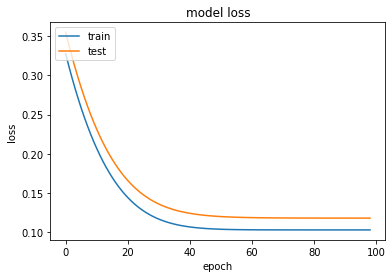

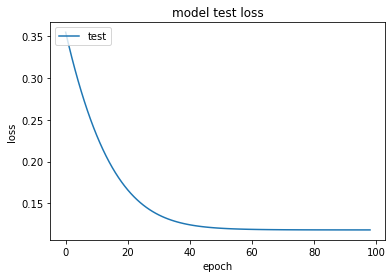

<Figure size 432x288 with 0 Axes>

In [20]:
ann.save_image()